In [1]:
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from geoalchemy2 import Geometry
import geopandas as gpd
import pandas as pd
from shapely import wkt
import psycopg2

In [2]:
# import packages
import requests
import json
import pandas as pd
import geopandas as gpd

In [3]:
pip install GeoAlchemy2 SQLAlchemy psycopg2

Note: you may need to restart the kernel to use updated packages.


# Creating dataframe of API

In [4]:
# send the request
def jason2dataf(url):
    response = requests.get(url)
    response
    # store the raw text of the response in a variable
    raw_data = response.text
    raw_data
    # parse the raw text response into a JSON
    data = json.loads(raw_data)
    data
    # from JSON to Pandas DataFrame
    data_df = pd.json_normalize(data)
    return data_df

In [5]:
#dataf_liguria = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/regioni/7')
dataf_lombardia = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/regioni/3')
#dataf_Piemonte = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/regioni/1')
#dataf_valle = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/regioni/2')
data_prov_milan = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/15')
data_prov_varese = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/12')
data_prov_como = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/13')
data_prov_lecco = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/97')
data_prov_sondrio = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/14')
data_prov_bergamo = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/16')
data_prov_brescia = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/17')
data_prov_pavia = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/18')
data_prov_cremona = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/19')
data_prov_mantova = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/20')
data_prov_lodi = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/98')
data_prov_Monza = jason2dataf('https://test.idrogeo.isprambiente.it/api/pir/province/108')



In [6]:
# Merge the DataFrames
merged_df = pd.concat([data_prov_milan, data_prov_varese,data_prov_como,data_prov_lecco,data_prov_sondrio,data_prov_bergamo,data_prov_brescia,data_prov_pavia,data_prov_cremona,data_prov_mantova,data_prov_lodi,data_prov_Monza]).reset_index(drop=True)

# Display the merged DataFrame
merged_df.rename(columns={'cod_prov':'COD_PROV'}, inplace=True)
merged_df


,uid,osmid,breadcrumb,nome,extent,ar_kmq,ar_id_p3,ar_id_p2,ar_id_p1,aridp3_p,...,bbccfrp3p4,bbccfrp4_p,bbccfrp3_p,bbccfrp2_p,bbccfrp1_p,bbccfraa_p,bbccfrp34p,cod_rip,cod_reg,COD_PROV
0,15,44881,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Citta metropolitana di Milano,"[[8.706096074, 45.161471997], [9.551562493, 45...",1575.488,62.673,105.907,171.866,3.978,...,0,0.000,0.000,0.000,0,0,0.000,1,3,15
1,12,45347,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Varese,"[[8.552274922, 45.558314266], [9.066051438, 46...",1198.243,130.018,156.566,192.178,10.851,...,17,0.817,0.572,3.350,0,0,1.389,1,3,12
2,13,45614,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Como,"[[8.893503722, 45.639738102], [9.440807492, 46...",1279.019,117.575,128.773,145.502,9.193,...,78,2.592,2.729,10.095,0,0,5.321,1,3,13
3,97,45639,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Lecco,"[[9.24330642, 45.64960056], [9.540951561, 46.1...",805.601,82.834,86.845,113.981,10.282,...,40,2.061,2.788,16.242,0,0,4.848,1,3,97
4,14,46708,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Sondrio,"[[9.246549514, 46.011133476], [10.63229679, 46...",3195.683,115.336,151.012,286.671,3.609,...,49,2.022,2.932,45.399,0,0,4.954,1,3,14
5,16,44996,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Bergamo,"[[9.44583517, 45.422275093], [10.262210022, 46...",2754.864,117.224,154.644,211.433,4.255,...,92,1.653,1.727,7.825,0,0,3.380,1,3,16
6,17,44882,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Brescia,"[[9.836017764, 45.203939411], [10.840150466, 4...",4785.482,375.934,434.304,615.556,7.856,...,104,1.144,1.987,10.509,0,0,3.132,1,3,17
7,18,43483,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Pavia,"[[8.497851849, 44.679665047], [9.55136515, 45....",2968.585,298.073,376.219,699.258,10.041,...,17,0.377,0.691,1.257,0,0,1.069,1,3,18
8,19,43893,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Cremona,"[[9.45246066, 44.937178971], [10.597451228, 45...",1770.407,174.013,267.889,641.486,9.829,...,0,0.000,0.000,0.000,0,0,0.000,1,3,19
9,20,43798,"[{'id': 1, 'name': 'Nord-Ovest', 't': 'm'}, {'...",Provincia di Mantova,"[[10.309278301, 44.908313902], [11.427672761, ...",2341.353,320.965,420.959,1465.029,13.709,...,0,0.000,0.000,0.000,0,0,0.000,1,3,20


# Creating dataframe of shapefiles

In [7]:
shapefile_path_region = "./Limiti01012024_g/Reg01012024_g/Reg01012024_g_WGS84.shp"
shapefile_path_province = "./Limiti01012024_g/ProvCM01012024_g/ProvCM01012024_g_WGS84.shp"
gdf_region = gpd.read_file(shapefile_path_region)
gdf_province = gpd.read_file(shapefile_path_province)

# filter dataframe with desire columns 

In [8]:

desired_cod_RIP = [15,12,13,97,14,16,17,18,19,20,98,108]

# Filter the GeoDataFrame based on the desired cod_RIP values
filtered_gdf = gdf_province[gdf_province['COD_PROV'].isin(desired_cod_RIP)]

# Display the filtered DataFrame
filtered_gdf

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
11,1,3,12,0,12,Varese,-,Varese,VA,Provincia,245725.892185,1.199247e+09,"POLYGON ((483071.565 5104606.091, 483258.471 5..."
12,1,3,13,0,13,Como,-,Como,CO,Provincia,260826.682944,1.278951e+09,"MULTIPOLYGON (((498077.206 5089780.201, 497614..."
13,1,3,14,0,14,Sondrio,-,Sondrio,SO,Provincia,464369.058437,3.194889e+09,"POLYGON ((595652.364 5163515.664, 596042.425 5..."
14,1,3,15,215,215,-,Milano,Milano,MI,Città metropolitana,309240.491881,1.574446e+09,"MULTIPOLYGON (((538136.293 5004372.820, 539201..."
15,1,3,16,0,16,Bergamo,-,Bergamo,BG,Provincia,310721.767083,2.755688e+09,"POLYGON ((585288.233 5104483.086, 585414.670 5..."
16,1,3,17,0,17,Brescia,-,Brescia,BS,Provincia,446810.527901,4.787096e+09,"POLYGON ((615296.026 5132340.878, 615374.026 5..."
17,1,3,18,0,18,Pavia,-,Pavia,PV,Provincia,449757.268082,2.967929e+09,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."
18,1,3,19,0,19,Cremona,-,Cremona,CR,Provincia,365490.381311,1.769419e+09,"POLYGON ((542189.543 5037362.593, 542408.354 5..."
19,1,3,20,0,20,Mantova,-,Mantova,MN,Provincia,386948.335227,2.341843e+09,"POLYGON ((632564.649 5031233.651, 632845.881 5..."
96,1,3,97,0,97,Lecco,-,Lecco,LC,Provincia,181337.218195,8.053940e+08,"POLYGON ((532079.619 5104664.093, 533286.609 5..."


In [26]:
desired_cod_REG = [3]

# Filter the GeoDataFrame based on the desired cod_RIP values
filtered_gdf2 = filtered_gdf[filtered_gdf['COD_RIP'].isin(desired_cod_REG)]

# Display the filtered DataFrame
print(filtered_gdf2)

Empty GeoDataFrame
Columns: [COD_RIP, COD_REG, COD_PROV, COD_CM, COD_UTS, DEN_PROV, DEN_CM, DEN_UTS, SIGLA, TIPO_UTS, Shape_Leng, Shape_Area, geometry]
Index: []


<Axes: >

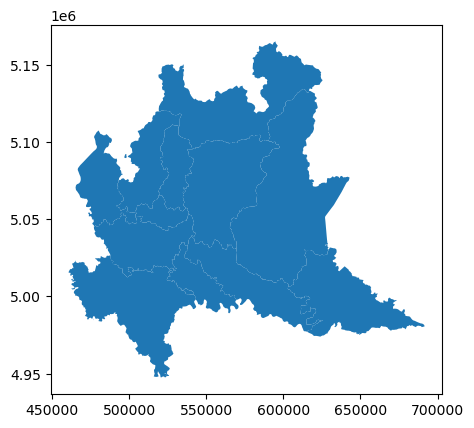

In [9]:
#merged_df2 = merged_df.merge(filtered_gdf[['COD_PROV', 'geometry']], on='COD_PROV', how='left')
geometry = filtered_gdf.pop('geometry')
filtered_gdf3 = gpd.GeoDataFrame(filtered_gdf, geometry=geometry)
merged_df3 = pd.merge(filtered_gdf3, merged_df, on='COD_PROV', how='left')
merged_gdf = gpd.GeoDataFrame(merged_df3, geometry='geometry')
merged_gdf.plot()

<Axes: >

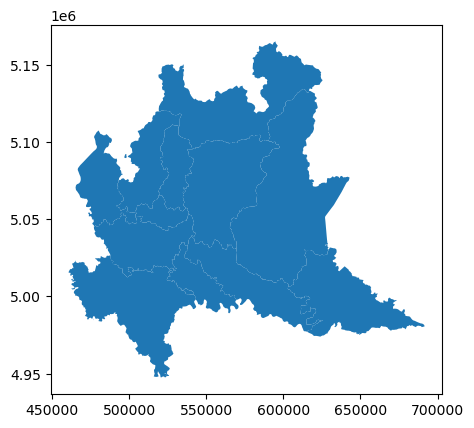

In [11]:
columns_to_select = ['geometry','cod_reg','cod_rip','COD_PROV','ar_kmq','nome','uid',
    'ar_fr_p3p4', 'ar_fr_p2', 'ar_fr_p1', 
    'pop_fr_p2', 'pop_fr_p1', 
    'ed_fr_p2', 'ed_fr_p1', 
    'ar_frp3p4p', 'popfrp3p4p', 
    'ed_fr_p3p4', 'edfrp3p4p'
]

# Select the columns
selected_df = merged_gdf[columns_to_select]
selected_df2 = selected_df.copy()
selected_df2.plot()


# Creating DB

In [12]:
from config import db_name, user, password, host
# Database connection parameters
# with open('config.py', 'w') as f:
#     f.write(db_name = input(f'Enter the database name for the postgres:\n'))
#     f.write(user = input(f'Enter the user for the postgres:\n'))
#     f.write(password = input(f'Enter the Password for the postgres:\n'))
#     f.write(host = input(f'Enter the host for the postgres:\n'))

# db_name = "project"
# user = "postgres"
# password = "admin"
# host = "localhost"
print (db_name, user, password, host)
# db_name = "project"
# user = "postgres"
# password = "admin"
# host = "localhost"

# Connect to the default database to create the new database
conn = psycopg2.connect(dbname="postgres", user=user, password=password, host=host)
conn.autocommit = True # needed to create a db programmatically
cursor = conn.cursor()

# Create the database
try:
    cursor.execute(f"CREATE DATABASE {db_name};")
except: pass

conn.close()

se_proj se4g user localhost


# Creating table

In [13]:
# Create SQLAlchemy base
Base = declarative_base()
# Define the table schema
class Dataset(Base):
    __tablename__ = 'dataset'
    id = Column(Integer, primary_key=True, autoincrement=True)
    cod_reg = Column(Integer)
    cod_rip = Column(Integer)
    cod_prov = Column(Integer)
    ar_kmq = Column(Float)
    nome = Column(String)
    uid = Column(Integer)
    ar_fr_p3p4 = Column(Float)
    ar_fr_p2 = Column(Float)
    ar_fr_p1 = Column(Float)
    pop_fr_p2 = Column(Float)
    pop_fr_p1 = Column(Float)
    ed_fr_p2 = Column(Float)
    ed_fr_p1 = Column(Float)
    ar_frp3p4p = Column(Float)
    popfrp3p4p = Column(Float)
    ed_fr_p3p4 = Column(Float)
    edfrp3p4p = Column(Float)
    geometry = Column(Geometry('MULTIPOLYGON'))

# Create an engine and connect to the PostgreSQL database
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:5432/{db_name}')
Base.metadata.create_all(engine)

C:\Users\Mohd Ammar Mughees\AppData\Local\Temp\ipykernel_8652\1135081772.py:2: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


# complete the rows of table by information of API and shapefiles


In [14]:

#gdf = gpd.GeoDataFrame(selected_df2, geometry=gpd.GeoSeries.from_wkt(selected_df2['geometry']))

# Convert geometries to WKT format
#gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom.wkt)
selected_df2['geometry'] = selected_df2['geometry'].apply(wkt.dumps)
# Insert the data into the PostgreSQL database
Session = sessionmaker(bind=engine)
session = Session()

for index, row in selected_df2.iterrows():
    dataset_entry = Dataset(
        cod_reg=row['cod_reg'],
        cod_rip=row['cod_rip'],
        cod_prov=row['COD_PROV'],
        ar_kmq=row['ar_kmq'],
        nome=row['nome'],
        uid=row['uid'],
        ar_fr_p3p4=row['ar_fr_p3p4'],
        ar_fr_p2=row['ar_fr_p2'],
        ar_fr_p1=row['ar_fr_p1'],
        pop_fr_p2=row['pop_fr_p2'],
        pop_fr_p1=row['pop_fr_p1'],
        ed_fr_p2=row['ed_fr_p2'],
        ed_fr_p1=row['ed_fr_p1'],
        ar_frp3p4p=row['ar_frp3p4p'],
        popfrp3p4p=row['popfrp3p4p'],
        ed_fr_p3p4=row['ed_fr_p3p4'],
        edfrp3p4p=row['edfrp3p4p'],
        geometry=row['geometry']
    )
    session.add(dataset_entry)

session.commit()
session.close()

C:\Users\Mohd Ammar Mughees\AppData\Local\Temp\ipykernel_8652\2104603164.py:5: UserWarning: Geometry column does not contain geometry.
  selected_df2['geometry'] = selected_df2['geometry'].apply(wkt.dumps)


In [15]:
# db is finished 